<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/PNEUMONIA_Xray_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
import zipfile
zip_path='/content/chest-xray-pneumonia.zip'
zipref=zipfile.ZipFile(zip_path,'r')
zipref.extractall('/tmp/xray')
zipref.close()

In [ ]:
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### **NORMAL CHESTS** 

In [ ]:
fig=plt.gcf()
fig.set_size_inches(4*2,4*2)
path='/tmp/xray/chest_xray/val/NORMAL/'
normalname=os.listdir(path)
normal=[os.path.join(path,fname) for fname in normalname[0:8]]
for i,img in  enumerate(normalname):
  sub=plt.subplot(4,2,i+1)
  sub.axis('off')
  a=mpimg.imread(path+img)
  plt.imshow(a)

## **PNEUMONIA AFFECTED CHESTS**

In [ ]:
fig=plt.gcf()
fig.set_size_inches(4*2,4*2)
path='/tmp/xray/chest_xray/val/PNEUMONIA/'
normalname=os.listdir(path)
normal=[os.path.join(path,fname) for fname in normalname[0:8]]
for i,img in  enumerate(normalname):
  sub=plt.subplot(4,2,i+1)
  sub.axis('off')
  a=mpimg.imread(path+img)
  plt.imshow(a)

In [ ]:
traindatagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
testdatagen=ImageDataGenerator(rescale=1./255)
traindir='/tmp/xray/chest_xray/train'
testdir='/tmp/xray/chest_xray/test'
traindata=traindatagen.flow_from_directory(traindir,target_size=(70,70),batch_size=30,class_mode='binary')
testdata=testdatagen.flow_from_directory(testdir,target_size=(70,70),batch_size=30,class_mode='binary')

In [ ]:
traindata.class_indices

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(5,5),padding='same',input_shape=(70,70,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D((2,2)),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                  tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
                                  tf.keras.layers.Flatten(),
                                  #tf.keras.layers.Dense(64,activation='relu'),
                                  #tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])
#learning_rate=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8*10**(epoch/20))
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
history=model.fit(traindata,epochs=30,validation_data=testdata,shuffle=True,batch_size=40)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
dir_path='/tmp/xray/chest_xray/val/PNEUMONIA/'
for i in os.listdir(dir_path):
  plt.figure(figsize=(5,5))
  img1=image.load_img(dir_path+'//'+i,target_size=(70,70))
  plt.imshow(img1)
  plt.show()
  x=image.img_to_array(img1)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  print(val)
  if val==0:
    print('Normal')
  if val>0:
    print('Pneumonia')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
dir_path='/tmp/xray/chest_xray/val/NORMAL/'
for i in os.listdir(dir_path):
  plt.figure(figsize=(5,5))
  img1=image.load_img(dir_path+'//'+i,target_size=(70,70))
  plt.imshow(img1)
  plt.show()
  x=image.img_to_array(img1)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  print(val)
  if val==0:
    print('Normal')
  if val>0:
    print('Pneumonia')

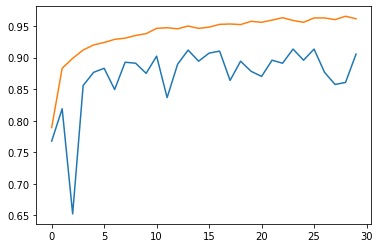

In [ ]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=np.arange(30)
plt.plot(epochs,val_acc,)
plt.plot(epochs,train_acc)


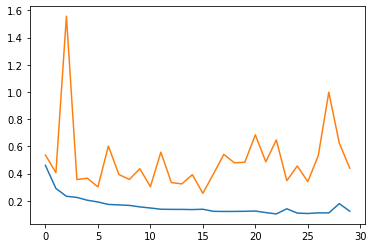

In [ ]:
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)

Saving xraynormal.jpg to xraynormal.jpg
[[0.]]
Normal


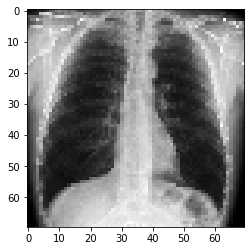

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img2 = image.load_img(path, target_size=(70, 70))
  plt.imshow(img2)
  x = image.img_to_array(img2)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  val = model.predict(images, batch_size=10)
  print(val)
  if val==0:
    print('Normal')
  if val>0:
    print('Pneumonia')

In [ ]:
from sklearn.metrics import f1_score
Y_true=[0,0,0,0,0,0,0,0]
Y_predict=[0,0,0,0,1,1,0,0]
print(f1_score(Y_true,Y_predict,average='micro'))

0.75
